<a href="https://colab.research.google.com/github/JianfengMI/MLprojects/blob/main/Sentiment_analysis_of_stock_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is a Python and Data Science scraper focused on building a script that analyzes the sentiment of news articles of stocks on FinViz. Use *pyfinviz.quote* to retrieve the data and apply Sentiment analysis on the data with NLTK, finally visualize the results with MatPlotLib.

**Limits**: due to the limit of free version of Pyfinviz, we only can retrieve limited news (around 100).

**Other methods**: Trading veiw, Stock Rover, Benzinga Pro, etc.

In [2]:
!pip install pyfinviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.4 MB/s eta 0:00:00
  Created wheel for pyfinviz: filename=pyfinviz-1.2-py3-none-any.whl size=40280 sha256=b4cbe1355c6b3b381122803e95151632bd7e12560a350eff15a903e593c6db0e
  Stored in directory: /root/.cache/pip/wheels/fe/b4/30/b32cec9c427cad0824fcd50a3cd0969a23a496981f7f57098d
  Created wheel for free-proxy: filename=free_proxy-1.1.3-py3-none-any.whl size=6097 sha256=4bf45f4445e46a892580a0a691a9f16f7a701d3ec5fa16568a0c6132440a265d
  Stored in directory: /root/.cache/pip/wheels/9e/f8/90/1e74c4166b7fbb213260a35e83fac3119f5e390c8bddda8a37
Successfully built pyfinviz free-proxy


In [53]:
from pyfinviz.quote import Quote
import pandas as pd

# ticker list
tickers = ['NVDA', 'AMD', 'GOOG']

# iterate the ticker list
for ticker in tickers:
  quote = Quote(ticker=ticker)
  # check if the fetch was successful
  if quote.exists:
    # Access the news DateFram
    news_df = quote.outer_news_df
    # Add ticker column
    news_df['ticker'] = ticker

    # Reorder columns to have ticker first
    cols = ['ticker'] + [col for col in news_df.columns if col != 'ticker']
    news_df = news_df[cols]

In [54]:
news_df.head()

,ticker,Date,Headline,URL,From
0,GOOG,08-13-2025 09:39AM,Saudi Arabia Cloud Computing Market Outlook an...,https://finance.yahoo.com/news/saudi-arabia-cl...,(GlobeNewswire)
1,GOOG,08-13-2025 09:00AM,"A Week After ChatGPT-5 Launches, AI Agents are...",https://finance.yahoo.com/news/week-chatgpt-5-...,(GlobeNewswire)
2,GOOG,08-13-2025 08:55AM,Kodaks Troubles Hold a Lesson for the AI Age,https://finance.yahoo.com/m/c8695952-73a8-3e1e...,(Barrons.com)
3,GOOG,08-13-2025 08:54AM,Jonathan Kanter on Perplexity's bid for Chrome...,https://www.youtube.com/watch?v=RZ1kUmszMoc,(CNBC TV)
4,GOOG,08-13-2025 08:04AM,5 Things to Know Before the Stock Market Opens,https://finance.yahoo.com/m/db9e9fd1-2021-3d38...,(Investopedia)


In [55]:
def parse_mixed_datetime(date_str):
    # Define possible formats
    formats = [
        '%m-%d-%Y %I:%M%p',  # e.g., "08-13-2025 08:30AM"
        '%b-%d-%y %I:%M%p'   # e.g., "Aug-11-25 04:39PM"
    ]
    # Try each format
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    # Return NaT if all formats fail
    return pd.NaT


In [56]:
# Apply custom parsing to handle mixed formats
news_df['datetime'] = news_df['Date'].apply(parse_mixed_datetime)
# Extract date component into 'day' column
news_df['day'] = news_df['datetime'].dt.date
news_df['time'] = news_df['datetime'].dt.time
# Drop temporary datetime column if not needed
news_df = news_df.drop(columns=['datetime','Date'])

/tmp/ipython-input-3064311866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['datetime'] = news_df['Date'].apply(parse_mixed_datetime)
/tmp/ipython-input-3064311866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['day'] = news_df['datetime'].dt.date
/tmp/ipython-input-3064311866.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [57]:
news_df.head()

,ticker,Headline,URL,From,day,time
0,GOOG,Saudi Arabia Cloud Computing Market Outlook an...,https://finance.yahoo.com/news/saudi-arabia-cl...,(GlobeNewswire),2025-08-13,09:39:00
1,GOOG,"A Week After ChatGPT-5 Launches, AI Agents are...",https://finance.yahoo.com/news/week-chatgpt-5-...,(GlobeNewswire),2025-08-13,09:00:00
2,GOOG,Kodaks Troubles Hold a Lesson for the AI Age,https://finance.yahoo.com/m/c8695952-73a8-3e1e...,(Barrons.com),2025-08-13,08:55:00
3,GOOG,Jonathan Kanter on Perplexity's bid for Chrome...,https://www.youtube.com/watch?v=RZ1kUmszMoc,(CNBC TV),2025-08-13,08:54:00
4,GOOG,5 Things to Know Before the Stock Market Opens,https://finance.yahoo.com/m/db9e9fd1-2021-3d38...,(Investopedia),2025-08-13,08:04:00


In [31]:
!pip install nltk

In [32]:
import nltk

In [33]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

In [35]:
vader = SentimentIntensityAnalyzer()

In [37]:
# example of vader polarity score
vader.polarity_scores("I dont want to watch this movie again!")

{'neg': 0.201, 'neu': 0.799, 'pos': 0.0, 'compound': -0.1316}

In [58]:
f = lambda Headline: vader.polarity_scores(Headline)['compound']
news_df['compound'] = news_df['Headline'].apply(f)

In [59]:
news_df.head()

,ticker,Headline,URL,From,day,time,compound
0,GOOG,Saudi Arabia Cloud Computing Market Outlook an...,https://finance.yahoo.com/news/saudi-arabia-cl...,(GlobeNewswire),2025-08-13,09:39:00,0.0000
1,GOOG,"A Week After ChatGPT-5 Launches, AI Agents are...",https://finance.yahoo.com/news/week-chatgpt-5-...,(GlobeNewswire),2025-08-13,09:00:00,0.0000
2,GOOG,Kodaks Troubles Hold a Lesson for the AI Age,https://finance.yahoo.com/m/c8695952-73a8-3e1e...,(Barrons.com),2025-08-13,08:55:00,-0.4588
3,GOOG,Jonathan Kanter on Perplexity's bid for Chrome...,https://www.youtube.com/watch?v=RZ1kUmszMoc,(CNBC TV),2025-08-13,08:54:00,-0.4215
4,GOOG,5 Things to Know Before the Stock Market Opens,https://finance.yahoo.com/m/db9e9fd1-2021-3d38...,(Investopedia),2025-08-13,08:04:00,0.0000


In [40]:
import matplotlib.pyplot as plt

In [60]:
mean_df = news_df.groupby(['ticker', 'day'])['compound'].mean()

In [68]:
mean_df.shape

(4,)

In [62]:
unstack_df = mean_df.unstack()

In [63]:
unstack_df.head()

day,2025-08-10,2025-08-11,2025-08-12,2025-08-13
ticker,,,,
GOOG,0.3641,0.08315,0.102987,-0.015138


In [65]:
final_df = unstack_df.transpose()

In [66]:
final_df.head()

ticker,GOOG
day,
2025-08-10,0.364100
2025-08-11,0.083150
2025-08-12,0.102987
2025-08-13,-0.015138


In [67]:
final_df.shape

(4, 1)

<Axes: xlabel='day'>

<Figure size 1000x600 with 0 Axes>

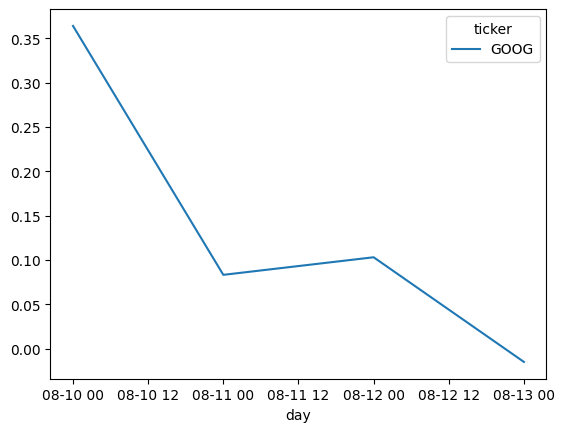

In [69]:
plt.figure(figsize = (10,6))
final_df.plot()